## Problem Analysis Workshop #5

#### Team members

1. Mostafa Allahmoradi - 9087818
2. Cemil Caglar Yapici – 9081058
3. Jarius Bedward - 8841640

#### Notes:
- The link to the data set is https://www.kaggle.com/datasets/adilshamim8/daily-food-and-nutrition-dataset
-

#### Research Question & Use Case

Research Question:

How can nutritional components like calories, macronutrients, and food categories be used to identify and predict potential disease risk score


Use Case:

This workshop uses daily food intake data to delve deeper into how nutrient content and food categories disease risk. The data is transformed in ways such as encoding meal types numerically, converting categorical values to dummies or normalizing fat or calorie edata to make it easier to train models that recognize patterns and predict meal types.

##### Imports

In [322]:
import pandas as pd
from scipy import stats
from sdmetrics.single_table import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve




##### Load Dataset
- Dataset contains daily nutritional intake, measurements, activity level and recorded diseases

In [323]:
#load dataset into dataframe
macro_dataset = pd.read_csv('data/detailed_meals_macros_.csv')

#Display firstrows
display(macro_dataset.head())
#show summary of info like data types
display(macro_dataset.info())
#show stasiscial summary
display(macro_dataset.describe().T)

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Calories,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snack Suggestion,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,2020.0,60.0,250.0,60.0,Greek yogurt with fruit,150,10,20,5,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,10.0,5.0,31.0,27.0,Apple with almond butter,180,4,30,8,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,326.0,55.0,150.0,15.0,Trail mix,300,8,34,20,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,...,278.0,20.0,163.0,27.0,Banana with peanut butter,210,5,30,9,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,...,186.0,6.3,186.0,22.0,Fruit and nut mix,250,6,28,15,Weight Gain


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ages                     1698 non-null   int64  
 1   Gender                   1698 non-null   object 
 2   Height                   1698 non-null   int64  
 3   Weight                   1698 non-null   int64  
 4   Activity Level           1698 non-null   object 
 5   Dietary Preference       1698 non-null   object 
 6   Daily Calorie Target     1698 non-null   int64  
 7   Protein                  1698 non-null   int64  
 8   Sugar                    1698 non-null   float64
 9   Sodium                   1698 non-null   float64
 10  Calories                 1698 non-null   int64  
 11  Carbohydrates            1698 non-null   int64  
 12  Fiber                    1698 non-null   float64
 13  Fat                      1698 non-null   int64  
 14  Breakfast Suggestion    

None

,count,mean,std,min,25%,50%,75%,max
Ages,1698.0,43.961720,15.915002,18.0,30.0000,42.00,57.000,79.00
Height,1698.0,174.130153,13.420936,150.0,163.2500,174.00,185.000,200.00
Weight,1698.0,78.064193,16.949264,48.0,64.0000,78.00,91.000,119.00
Daily Calorie Target,1698.0,2275.171967,558.812405,1200.0,1800.0000,2200.00,2689.000,4364.00
Protein,1698.0,139.898115,53.326588,50.0,100.0000,136.00,174.000,327.00
Sugar,1698.0,126.192580,34.938902,60.0,100.0000,124.00,150.000,218.00
Sodium,1698.0,27.979623,10.665318,10.0,20.0000,27.20,34.800,65.40
Calories,1698.0,2196.440518,571.089569,990.0,1770.2500,2146.00,2549.750,4357.00
Carbohydrates,1698.0,252.385159,69.877804,120.0,200.0000,248.00,300.000,436.00
Fiber,1698.0,30.286219,8.385337,14.4,24.0000,29.76,36.000,52.32


### Basic Cleaning of data
- Handles duplicates
- Handles missing values
- remove whitespace

In [324]:
# removes duplicates
macro_dataset =  macro_dataset.drop_duplicates()

#dropas all rows that have nan
macro_dataset = macro_dataset.dropna()

#Removes whitespaces from column names
macro_dataset.columns = macro_dataset.columns.str.strip()


macro_dataset.head()



,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Calories,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snack Suggestion,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,2020.0,60.0,250.0,60.0,Greek yogurt with fruit,150,10,20,5,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,10.0,5.0,31.0,27.0,Apple with almond butter,180,4,30,8,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,326.0,55.0,150.0,15.0,Trail mix,300,8,34,20,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,...,278.0,20.0,163.0,27.0,Banana with peanut butter,210,5,30,9,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,...,186.0,6.3,186.0,22.0,Fruit and nut mix,250,6,28,15,Weight Gain


##### Feature Engineering

In [325]:
#Add Height in meters feature
macro_dataset['Height_m'] = macro_dataset['Height'] / 100  # convert cm → m

#Add BMI feature
macro_dataset['BMI'] = macro_dataset['Weight'] / (macro_dataset['Height_m'] ** 2)

# Add Obesity feature
# Target variable for Obesity (1 if BMI >= 30)
macro_dataset['Obesity'] = np.where(macro_dataset['BMI'] >= 30, 1, 0)



#Add Heart_Disease feature
#Target variable for Heart Disease (1 if has Heart Disease)
macro_dataset['Heart_Disease'] = np.where(macro_dataset['Disease'].str.contains('Heart', na=False), 1, 0)

#Converting Activity Level to numeric
macro_dataset['Activity Level'] = macro_dataset['Activity Level'].astype('category').cat.codes

#### Visualize Data
- Quick Visualization of the
- Shows the shape of the data
- Frequency of data
- Outliers

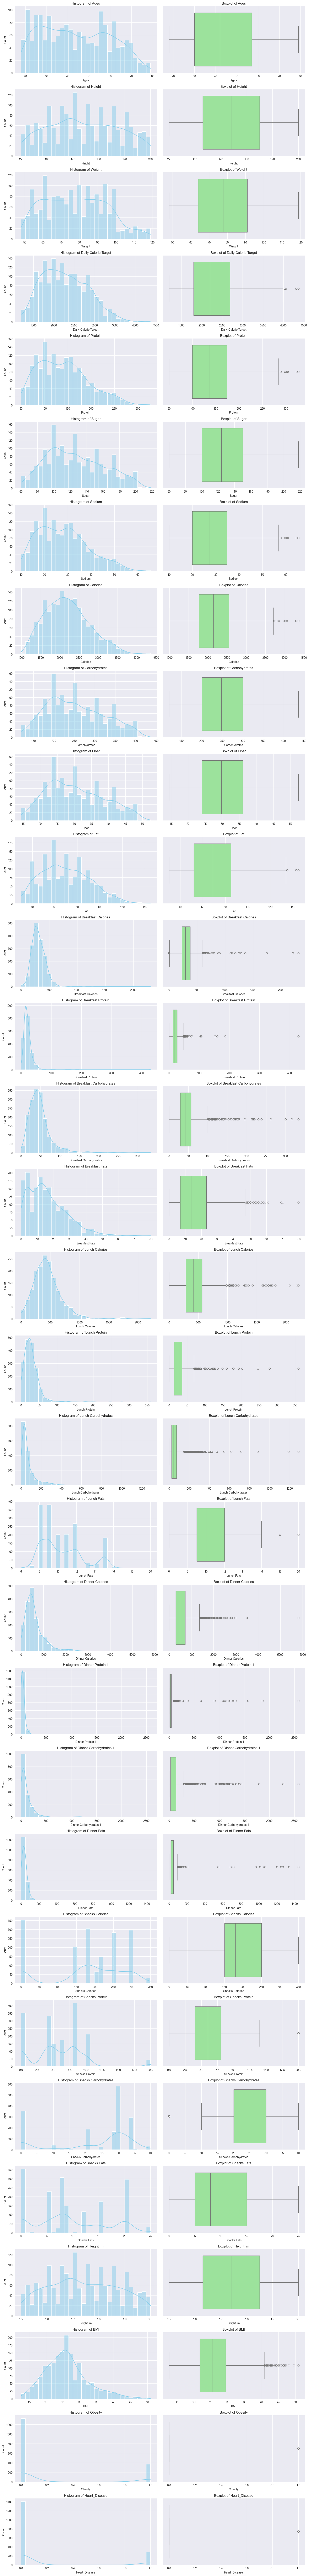

In [326]:
# Use numeric columns only for this
numeric_cols = macro_dataset.select_dtypes(include=["int64", "float64"]).columns

# Set up the figure size

plt.figure(figsize=(15, len(numeric_cols)*4))

for i, col in enumerate(numeric_cols):
    #Histogram
    plt.subplot(len(numeric_cols), 2, 2*i+1)
    sns.histplot(macro_dataset[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')

    #Boxplot
    plt.subplot(len(numeric_cols), 2, 2*i+2)
    sns.boxplot(x=macro_dataset[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')


plt.tight_layout()
plt.show()

#### Select Features and Target

The goal is to predict Heart Disease using:
- BMI
- Carbs
- Sugar
- Fat
- Sodium
- Cholesterol
- Age
- Activity Level

In [327]:
#List of features chosen to use for predicting heart disease
features = [
     "BMI", "Carbohydrates", "Sugar", "Fat",
    "Sodium", "Calories",
    "Ages", "Activity Level"
]
# seoreate the features  x and target y
x =  macro_dataset[features]
y = macro_dataset["Heart_Disease"]

#### Train/Test Split

In [328]:

# spli the dataset into trainin gand test sets
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42, stratify= y
)

#intialize scaler and fit transform training data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Implement Non-Linear Regression (Polynomial Regression)

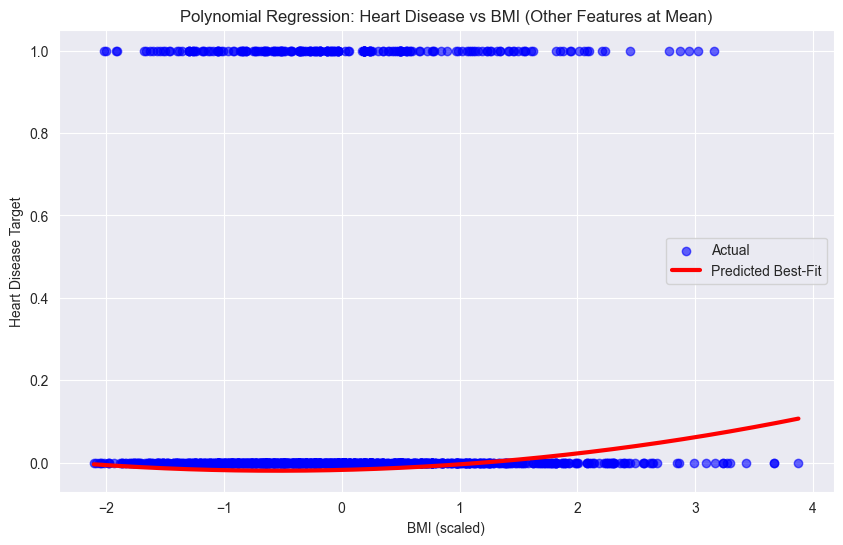

In [329]:


#Features and target

x =  macro_dataset[features].values
y = macro_dataset["Heart_Disease"].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)


#Create polynomial features of degree 2
poly =  PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)


#fit polynomial regression
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)



#Visualize effect of BMi while holding others at mean
idx = 0  # BMI index
x_range = np.linspace(x_scaled[:, idx].min(), x_scaled[:, idx].max(), 300).reshape(-1,1)
#Base array with mean values for other features
x_base = np.tile(x_scaled.mean(axis=0), (x_range.shape[0],1))
x_base[:, idx] = x_range[:,0]
#make pred on training set
y_pred_poly = poly_model.predict(poly.transform(x_base))




#Plot polynomial
plt.figure(figsize=(10,6))
plt.scatter(x_train_scaled[:, idx], y_train, color='blue', alpha=0.6, label='Actual')
plt.plot(x_range, y_pred_poly, color='red', linewidth=3, label='Predicted Best-Fit')
plt.xlabel('BMI (scaled)')
plt.ylabel('Heart Disease Target')
plt.title('Polynomial Regression: Heart Disease vs BMI (Other Features at Mean)')
plt.legend()
plt.grid(True)
plt.show()


#### 500 Word Discussion For Non Linear Regression
- In the workshop, A polynomial regression model was implemented to be able to predict  the risk of Heart Disease based on a multitude of factors from nutritional and demographic features, including BMI, carbohydrates, sugar, fat, sodium, calories, age and activity level.  Polynomial regression extends linear regression by including higher-order terms of the input features, which allows the model to capture non-linear relationships between predictors and the target variable. In this example, a degree-2 polynomial expansion was used to account for potential quadratic interaction among features.

- Further, the dataset was rigorously preprocessed, this includes the removal of duplicates, the handling of missing values, and scaling of various numeric features to make sure numerical stability during the model training. Polynomial feature expansion was applied to the scaled training set, and a linear regression model was then fit to these transformed features. For visualization, the effect of BMI on Heart Disease wa spotted while holiday other features at their mean values, which highlighted the non-linear trend captured by the polynomial model

- The polynomial regression approach demonstrated the advantage of capturing non-linear interactions between features and disease risk, which a simple linear model might fail to capture. For example, interactions between BMI and age or between sodium intake and activity level may have subtle effects on disease risk that become apparent in a quadratic feature space. However, the models interoperability deceases as a feature interactions increase, and care must be taken to avoid of overfitting, especially with higher-degree polynomial expansions. In practice, regulation or alternative methods such as logistic regression could provide more interpretable and probabilistically valid predictions

- Overall, polynomial regression provided an infomrative exploration of how combined nutritional and demographic factors relate to Heart Disease. The approach highlights the importance of considering non-linear effects in predictive modelling and demonstrates how preprocessing, feature scaling and careful evaluation metrics
-
- contribute to understanding model performance
- This is a great stepping stone in understanding how these features can help predict different diseases which is the end goal of the term project
-

#### Logistic Regression

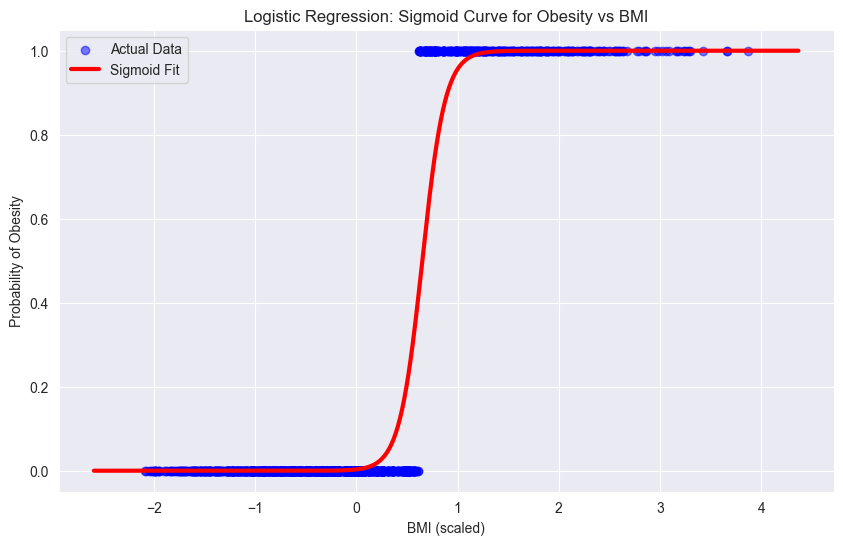

In [330]:
# Feature and Target

x = macro_dataset[["BMI"]].values #2d array for sklearn
y = macro_dataset["Obesity"].values


#Scale BMI for smoother fitting
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


#fit logistic regression
logist_model = LogisticRegression(max_iter=5000)
logist_model.fit(x_scaled, y)

# Create a dsnse BMi range for a smooth sigmoid curve
x_range = np.linspace(x_scaled.min()-0.5, x_scaled.max()+0.5,1000).reshape(-1,1)

#predct priabbilites for sigmoid curve

y_prob = logist_model.predict_proba(x_range)[:,1]

#plot
plt.figure(figsize=(10,6))
plt.scatter(x_scaled, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(x_range, y_prob, color='red', linewidth=3, label='Sigmoid Fit')
plt.xlabel('BMI (scaled)')
plt.ylabel('Probability of Obesity')
plt.title('Logistic Regression: Sigmoid Curve for Obesity vs BMI')
plt.legend()
plt.grid(True)
plt.show()

#### Model Evaluation
- On Logistic Regression

In [331]:
#Predict class labels on the test set
x_test_BMI = x_test[["BMI"]].values
x_test_scaled_BMI = scaler.transform(x_test_BMI)

y_pred_test = logist_model.predict(x_test_scaled_BMI)

print("Accuracy:", accuracy_score(y_pred_test, y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Accuracy: 0.6941176470588235

Confusion Matrix:
 [[228  54]
 [ 50   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       282
           1       0.13      0.14      0.13        58

    accuracy                           0.69       340
   macro avg       0.47      0.47      0.47       340
weighted avg       0.70      0.69      0.70       340



#### Precision-Recall Curve

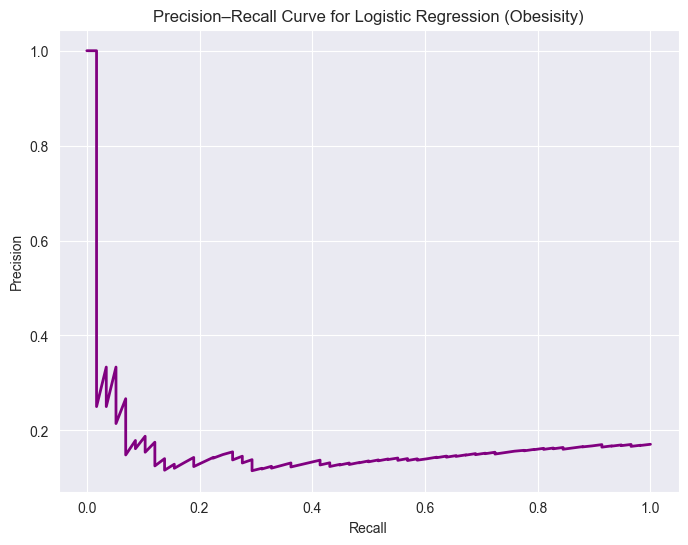

In [333]:
#Predicted proabilites for postive class

y_prob_test = logist_model.predict_proba(x_test_scaled_BMI)[:,1]

#Plot precision-recall urve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_test)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color="purple", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve for Logistic Regression (Obesisity)")
plt.grid(True)
plt.show()

#### 500-Word Logistic Regression Discussion
- Logistic Regression was employed to model the probability of obesity based on a set of nutritional and demographic features including BMI, carbohydrates, sugar, fat, sodium, calories, age and activity level. Unlike linear regression, logistic regression is specifically designed for binary outcomes, producing probabilities bounded between 0 and 1 via the logistic sigmoid function. THis property makes it particular suitable for predicting categorical outcomes such as presence or absence of obesity
- Prior to training, all numeric features were standardized using the StandardScaler to ensure that differences in magnitude did not bias the models convergence. The logistic regression model was then fit to the scaled training data, learning coefficients that represent the log-odds relationships between each feature and the probability of obesity. Predictions were made on the test set both as class labels(0 or 1) and as probabilities for visualization and precision-recall analysis.

- This is important for the term project as it enforces things like feature engineering as well as the goal is to be able to calculate likelihood of different diseases or conditions people have based on certain things and in this case BMI was used to calculate the probability

- A key visualization involved plotting BMI against the predicted probability of obesity, producing a smooth sigmoid curve that clearly illustrates how the likelihood of obesity increases with BMI while considering other features at their observed values. This curve provides an intuitive understanding of the models behavior and confirms the expected positive relationship between BMI and obesity risk. THe use o fall selected features allowed the model to account for additional influences, such as sugar or fat intake and activity level, ensuring that the predictions reflect the combined effects of multiple factors

- Model evaluation metrics, including accuracy, confusion matrix and classification report, demonstrated the logistic regression models performance on unseen test data. Furthermore, the precision-recall curve offered insights into the balance between correctly identifying obese individuals and minimising false positives, which is participatory important for imbalanced datasets. The results confirmed that logistic regression nto only provides interpretable coefficients but also produces meaningful probabilistic predictions that can be thresholded for classification decisions

- Overall, logistic regression proved to be an effective method for predicting obesity risk based on nutritional and lifestyle features. It's probabilistic framework allows for both classification and risk scoring, providing actionable insights for health interventions. Combined with proper feature scaling through train-test splitting, and visualization of predicted probabilities, the approach demonstrates how logistic regression can capture the underlying relationships in the data while remaining interpretable and robust